# Predicting Car Prices

![Photo by Evgeny Tchebotarev on Unsplash](/car_price.jpg)

## Introduction
This project focuses on building a robust and highly accurate machine learning model to predict the price of used cars. Utilizing a comprehensive dataset of car attributes, our goal is to develop a model that can effectively capture the complex relationship between a vehicle's specifications and its market value. The insights gained from this model are crucial for a competitive machine learning challenge, where model performance is judged on its ability to generalize to new, unseen data.


## Problem Definition

The central objective of this project is to accurately predict the price of a car based on a set of provided features. The dataset includes the following attributes:

id

brand

model

model_year

milage

fuel_type

engine

transmission

ext_col (exterior color)

int_col (interior color)

accident

clean_title

price (the target variable)

## Objective
Our primary objective is to minimize the Root Mean Square Error (RMSE) between the model's predicted prices and the actual prices. A lower RMSE score indicates a higher level of accuracy and a better-performing model. This is the key metric for evaluation in the competition.

## Challenge
The main challenge lies in building a model that not only performs well on the training data but also generalizes effectively to the test data. Based on previous attempts, the model has shown signs of overfitting, where its performance on the training data is significantly better than on the test data. Therefore, a critical part of the pipeline will be to implement strategies that prevent overfitting and ensure the model learns true patterns rather than memorizing the training data.

## Data Collection

The dataset was provided as part of the Data Science Nigeria 2025 ML Hackathon.

Here's a link to it: https://www.kaggle.com/competitions/hackathon-qualification/data

## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Note: If you need TargetEncoder, install and import from category_encoders:
from category_encoders import TargetEncoder
# If you need FreqDistEncoder, please specify the package or provide the implementation.


## Loading the dataset



In [2]:
# load the train dataset as pandas dataframe

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
train_df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [4]:
train_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

---

#### Brand



There are 57 unique car brands in the dataset.


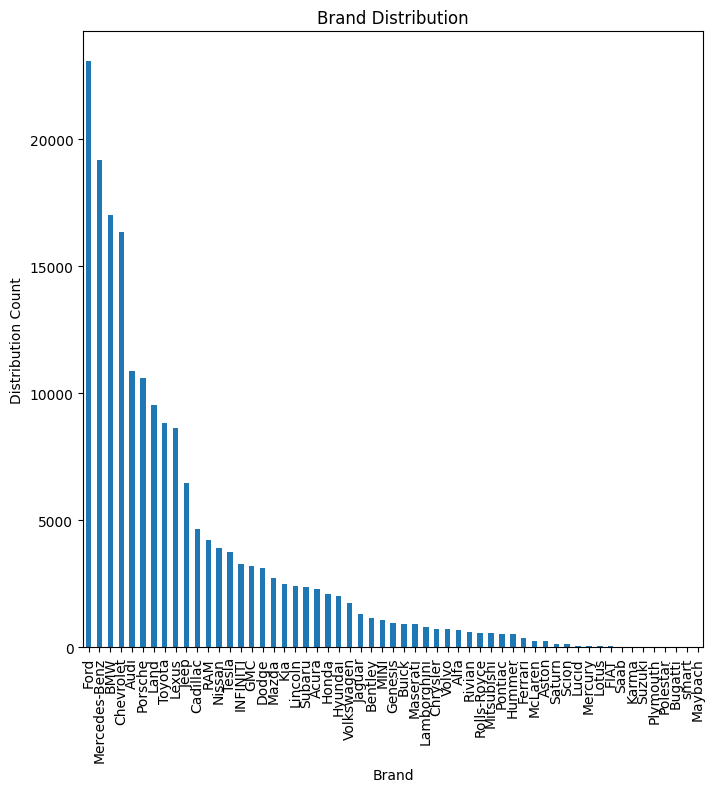

In [5]:
train_df['brand'].value_counts().plot(kind= 'bar', figsize=(8,8), 
                                      title='Brand Distribution', 
                                      xlabel= 'Brand', 
                                      ylabel= 'Distribution Count')

print(f'There are {train_df['brand'].nunique()} unique car brands in the dataset.')

In [6]:

def plot_categorical_distribution(column):
    
    """Function to plot the distribution of a categorical column
    """
    
    plt.figure(figsize=(10,6))
    sns.countplot(data=train_df, x=column, order=train_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print(f'There are {train_df[column].nunique()} unique {column}s in the dataset.')

#### Fuel Type

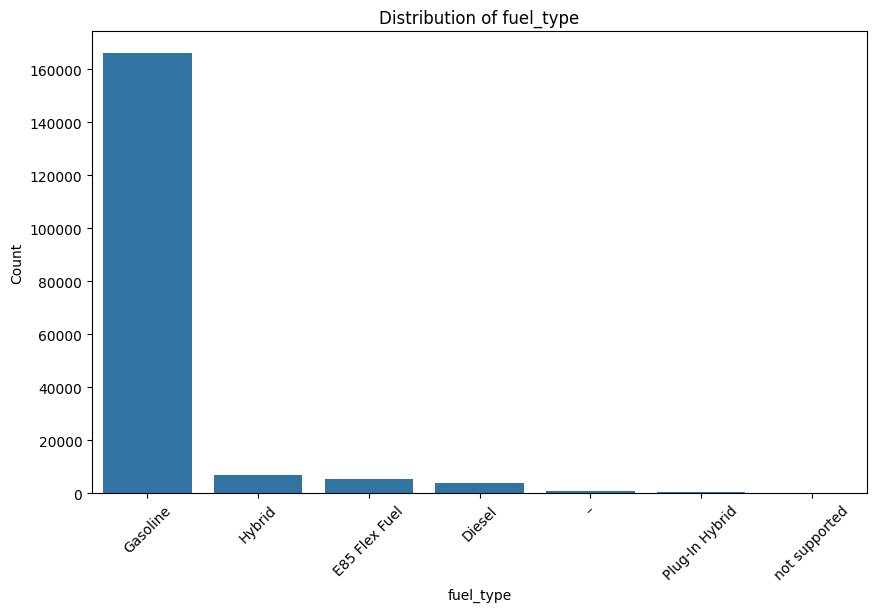

There are 7 unique fuel_types in the dataset.


In [7]:
plot_categorical_distribution('fuel_type')

#### Model Year

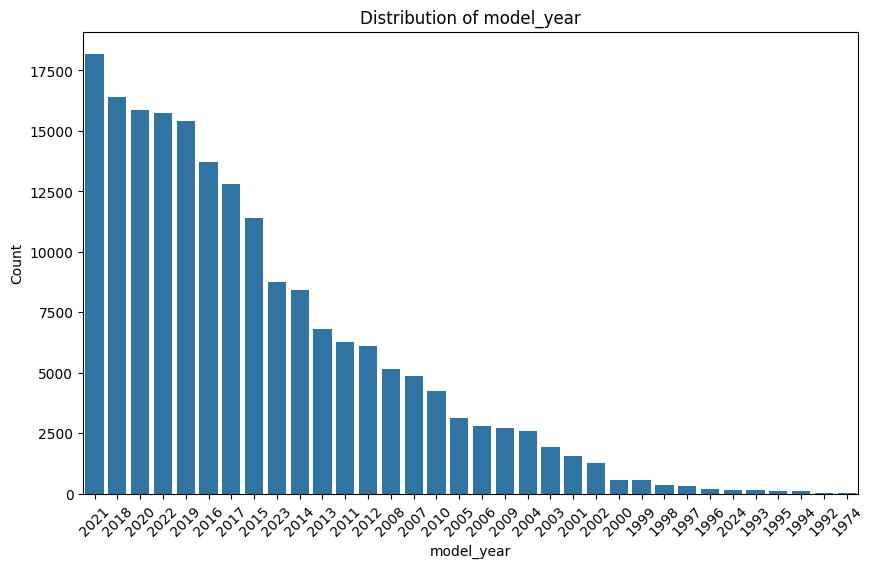

There are 34 unique model_years in the dataset.


In [8]:
plot_categorical_distribution('model_year')

#### Accident

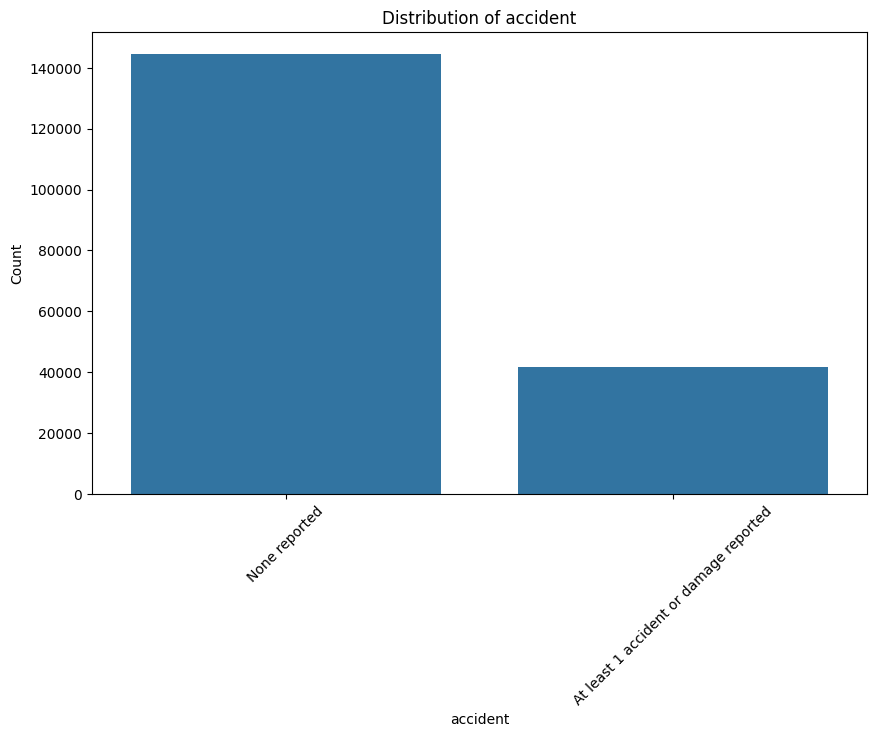

There are 2 unique accidents in the dataset.


In [9]:
plot_categorical_distribution('accident')

#### Transmission

In [10]:
train_df['transmission'].value_counts()

transmission
A/T                                                   49904
8-Speed A/T                                           20645
Transmission w/Dual Shift Mode                        19255
6-Speed A/T                                           18044
6-Speed M/T                                           11998
7-Speed A/T                                           11124
Automatic                                             10691
8-Speed Automatic                                      8431
10-Speed A/T                                           8044
9-Speed A/T                                            3866
5-Speed A/T                                            3217
10-Speed Automatic                                     3164
6-Speed Automatic                                      2799
4-Speed A/T                                            2546
5-Speed M/T                                            2409
9-Speed Automatic                                      2325
CVT Transmission           

In [11]:
# clean up the transmission column into atutomatic and manual transmission only.

# Write a function to clean the transmission column


# Define mapping logic
def classify_transmission(value):
    value = str(value).lower()
    if "manual" in value or "m/t" in value:
        return "M/T"
    elif "automatic" in value or "a/t" in value or "auto-shift" in value or "cvt" in value:
        return "A/T"
    elif "speed" in value:
        if "m/t" in value or "manual" in value:
            return "M/T"
        else:
            return "A/T"
    else:
        return "Unknown"  # Optional: handle edge cases

# Apply classification
train_df['transmission'] = train_df['transmission'].apply(classify_transmission)

# Optional: Check results
print(train_df['transmission'].value_counts())



transmission
A/T        152449
Unknown     19726
M/T         16358
Name: count, dtype: int64


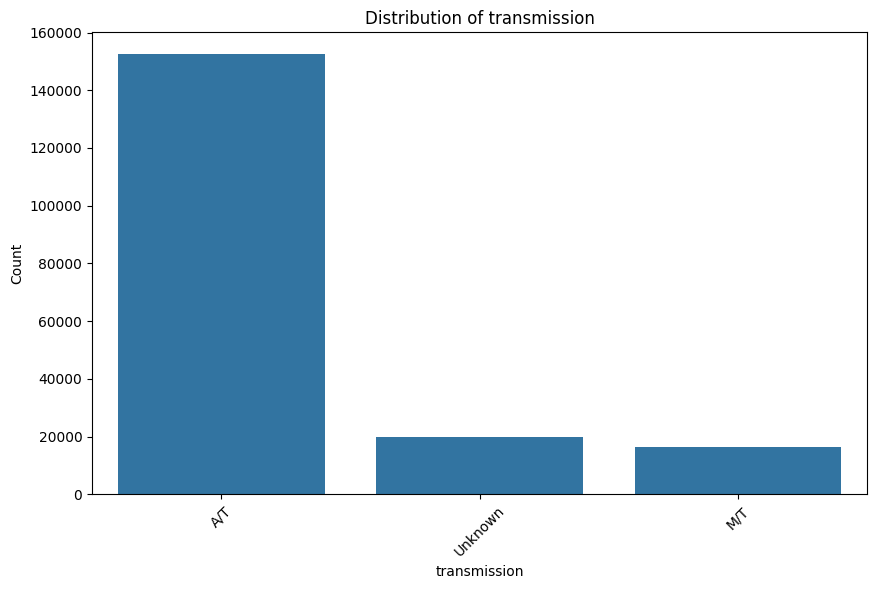

There are 3 unique transmissions in the dataset.


In [12]:
plot_categorical_distribution('transmission')

In [13]:
# clean up the transmission column into atutomatic and manual transmission only.

# Write a function to clean the transmission column


# Define mapping logic
def classify_color(value):
    value = str(value).lower()
    if "black" in value:
        return "Black"
    elif "white" in value:
        return "White"
    elif "gray" in value:
        return "Gray"
    elif "blue" in value or "blu" in value:
        return "Blue"
    elif "silver" in value:
        return "Silver"
    elif "red" in value:
        return "Red"
    elif "green" in value:
        return "Green"
    elif "yellow" in value:
        return "Yellow"
    elif "gold" in value:
        return "Gold"
    elif "brown" in value:
        return "Brown"
    elif "orange" in value:
        return "Orange"
    elif "beige" in value:
        return "Beige"
    else:
        return "Others"  # Optional: handle edge cases

# Apply classification
train_df['ext_col'] = train_df['ext_col'].apply(classify_color)
test_df['int_col'] = test_df['int_col'].apply(classify_color)


train_df['ext_col'] = train_df['ext_col'].apply(classify_color)
test_df['int_col'] = test_df['int_col'].apply(classify_color)


# Apply classification

## Data Preprocessing

### Handling Missing Values

#### Columns with missing values

1. fuel_type (cat)
2. accident (cat)
3. clean_title (cat)

In [14]:
# Handle missing values in train_df

# Create a function to handle missing values 

def handle_missing_values(df):
    # For categorical columns, fill missing values with the mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna('missing', inplace=True)
    
    # For numerical columns, fill missing values with the median
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        df[col].fillna(df[col].median(), inplace=True)
    
    return df

In [15]:
train_df = handle_missing_values(train_df)
test_df = handle_missing_values(test_df)

### Encode Categorical Variables

Which encoder to use?

* get_dummies()
* OneHotEncoder()
* LabelEncoder()

I am using TargetEncoder here because LabelEncoder works better for target vairables in a classification task.

In [16]:
# Encode categorical variables using OneHotEncoder

# Identify categorical and numerical columns
low_cardinality_categorical_cols = ['brand', 'fuel_type', 'transmission', 'accident', 'clean_title', 'ext_col'] #Label Encoding
high_cardinality_categorical_cols = ['model', 'engine'] # Target Encoding
numerical_cols = ['model_year', 'mileage', 'price']


# Label Encoding for low cardinality categorical columns
le = LabelEncoder()

def label_encode_columns(df, columns):
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

# Target Encoding for high cardinality categorical columns

def target_encode_columns(train, test, X_test, high_cardinality_categorical_cols, target):
    
    te = TargetEncoder(cols=high_cardinality_categorical_cols, smoothing=1)
    
    train_df_encoded = te.fit_transform(train, target)
    test_df_encoded = te.transform(test)
    X_test_encoded = te.transform(X_test)  
        
        
    return train_df_encoded, test_df_encoded, X_test_encoded


In [17]:
# Apply classification
test_df['transmission'] = test_df['transmission'].apply(classify_transmission)

# Optional: Check results
print(test_df['transmission'].value_counts())


transmission
A/T        101744
Unknown     13161
M/T         10785
Name: count, dtype: int64


## Feature Selection/Engineering

In [18]:
X = train_df.drop(['price', 'id', 'int_col'], axis=1) # Replace 'price' with your target column name
y = train_df['price']

X_test = test_df.drop(['id', 'int_col'], axis=1)

## Train-Test Split

In [19]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_val)}")


Training set size: 150826
Testing set size: 37707


In [20]:
X_test = label_encode_columns(X_test, low_cardinality_categorical_cols)
X_train = label_encode_columns(X_train, low_cardinality_categorical_cols)
X_val = label_encode_columns(X_val, low_cardinality_categorical_cols)


X_train, X_val, X_test = target_encode_columns(X_train, X_val, X_test, high_cardinality_categorical_cols, y_train)

## Model Initialization and Training

### with Grid Search

In [21]:
def train_with_cv(estimator, param_grid, X, y, cv_splits=5, scoring=None):
    """
    Perform K-Fold Cross Validation with hyperparameter tuning. Adjust params as you please

    Parameters:
    estimator : sklearn estimator
        The model to train (e.g., RandomForestRegressor(), LogisticRegression(), etc.)
    param_grid : dict
        Hyperparameter search space, e.g., {'n_estimators': [100, 200], 'max_depth': [5, 10]}
    X : Features
    y : Target variable
    cv_splits : int
        Number of folds for cross-validation
    scoring : str or callable
        Scoring metric (default: neg_root_mean_squared_error for regression)
    """
    # default scoring = RMSE for regression
    if scoring is None:
        scoring = make_scorer(root_mean_squared_error, squared=False)

    kfold = KFold(n_splits=cv_splits, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X, y)

    return grid_search.best_estimator_, grid_search.best_params_, grid_search.cv_results_

In [22]:
model=RandomForestRegressor()
model1=XGBRegressor()
#model.fit(X_train,y_train)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7, None],
    'min_samples_split': [2,10],
    'min_samples_leaf': [1]
}

best_model, best_params, cv_results = train_with_cv(model1, param_grid, X_train, y_train)

print("Best Params:", best_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [23]:
y_val_pred = best_model.predict(X_val)


val_rmse = root_mean_squared_error(y_val, y_val_pred)

print("Validation RMSE:", val_rmse)

Validation RMSE: 69540.421875


<Axes: ylabel='None'>

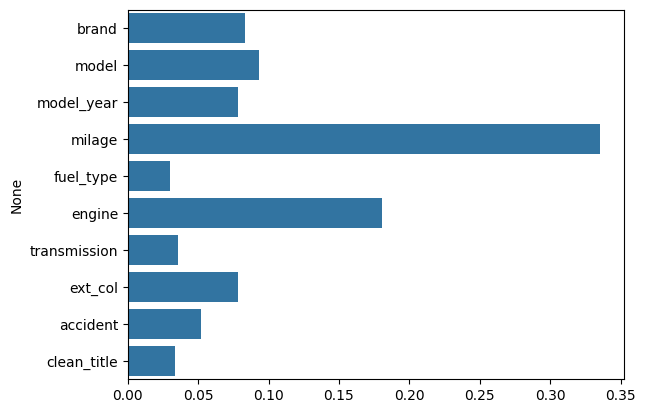

In [24]:

sns.barplot(y=X_train.columns, x=best_model.feature_importances_, orient='y')

In [25]:

final_model = RandomForestRegressor(**best_params,random_state=42)

final_model.fit(
    np.vstack([X_train, X_val]), 
    np.hstack([y_train, y_val])
)

,n_estimators,50
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_test_pred = final_model.predict(X_test)
y_test_pred[:5]

array([18088.91827312, 85308.93732119, 62293.92369159, 38424.18710951,
       32716.68084411])

In [27]:

test =pd.read_csv('test.csv')

submission=pd.DataFrame({"id":test['id'],"Price":y_test_pred})
submission.to_csv("Submissions.csv",index=False)